# Mini project 1 - Basic Data Analytics with Pandas

In the first week, we’ll practice data exploration and data analysis in Python with a real-world dataset – Sberbank data, which is available in the [Sberbank Russian Housing Market Kaggle competition](https://www.kaggle.com/c/sberbank-russian-housing-market). Sberbank dataset contains rich and messy data about Russian's housing market. This real-world data will provide you concrete practices for getting started with python. 

This step-by-step mini project will cover the most essential and useful techniques for data analysis in solving a real-world problem with key Python data analysis libraries: pandas and numpy. We’ll go through data loading and data frame creation, selection and query, grouping and function applying, plotting and writing data to file. 

In [1]:
# Start with importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Question 1: Read the train set and test set of Sberbank dataset from the train.csv and test.csv, and call them train_data and test_data. **

Hint: You can read data from a CSV file using the read_csv function in pandas. By default, it assumes that the fields are comma-separated.

In [2]:
train_data = pd.read_csv('train.csv',delimiter = ',')
test_data = pd.read_csv('test.csv',delimiter = ',')

** Question 2: Merge train and test to one dataframe and call it full_data. **

Hint: The new dataframe should have the rows from train_data followed by rows from test_data. Refer to [merge, join, and concatenate](https://pandas.pydata.org/pandas-docs/stable/merging.html). 

In [3]:
full_data = pd.concat([train_data,test_data], ignore_index = True)

***For the rest questions, if not specified, we'll do practice on train_data. Let's create a dataframe called df from train_data.***

In [4]:
df = train_data

** Question 3: Preview the first 10 columns with head().**

Hint: You can change the number of rows displayed by specifying a number. There is a similar function tail(), which will show you the last columns of a dataframe.

In [5]:
df.head(10)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


**Question 4: How many columns and rows are there in the data?**

In [6]:
df.shape

(30471, 292)

here is 30471 rows and 292 columns in the data

**Question 5: Which features are available in the data? Display the features.**

Hint: The features are the column names. You can print them out.

In [7]:
columns_name = list(df.columns)
print(columns_name)

['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'product_type', 'sub_area', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_ma

**Question 6: What's the data type of each column? Save the datatype as data_type.**

In [8]:
data_type = df.dtypes
#data_type is a series

In [9]:
data_type.index

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)

**Question 7: Which variables are numerical variables (excluding 'id')? Put all the numerical variable in list.**

Hint: Use the index of the data_type we just created in Q5. The data type of numerical variables should be int or float. Remenber to remove the 'id'.

In [10]:
numerical_var = []
for i in data_type.index:
    if data_type[i] == int or data_type[i] == float:
        numerical_var.append(i)
numerical_var.remove('id')
print(numerical_var)

['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'bu

**Question 8: Select the first 5 rows with 'id' (the 1st column) and 'price_doc' (the last column) columns from the data. **

Hint: You can find out several ways to solve this question. 

In [11]:
df_1 = df[['id','price_doc']].head(5)
print(df_1)

   id  price_doc
0   1    5850000
1   2    6000000
2   3    5700000
3   4   13100000
4   5   16331452


**Question 9: Select the rows with the full area larger than 10 and smaller than 1500. Full area is indicated by 'full_sq'.**

Hint: You can use boolean indexing or query. Try both methods.

In [12]:
df.loc[lambda x: (x['full_sq'] < 1500) & (x['full_sq'] > 10)]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


**Question 10: Find the index of the rows with full area ('full_sq') smaller than living area ('life_sq'). Change the 'life_sq' in these rows to NAN.**

In [13]:
index = df.loc[lambda x: x['full_sq'] < x['life_sq']].index
print(index)

Int64Index([ 1084,  1188,  1822,  1863,  2009,  4385,  6336,  6531,  6993,
             7208,  8101,  9237,  9256,  9482,  9646, 11332, 11711, 11784,
            12569, 13546, 13629, 13797, 14799, 16067, 16116, 16284, 20672,
            21080, 22412, 22611, 22804, 24296, 24428, 26264, 26342, 26363,
            29302],
           dtype='int64')


In [14]:
len(index)

37

In [16]:
for i in index:
    df.iloc[i].life_sq = np.nan

/Users/jyguo/miniconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


** Question 11: Check how many rows in life_sq are NAN? **

In [17]:
df['life_sq'].isnull().sum()

6383

**Question 12: The 'product_type' column tells us whether this housing is a owner-occupier purchase or investment. Which type is more common? What's the percentage of each type?**

In [28]:
owner_num = len(df.loc[lambda x: x['product_type'] == 'OwnerOccupier'])
inves_num = len(df.loc[lambda x: x['product_type'] == 'Investment'])

In [41]:
owner_pct = owner_num/len(df)
print ('The percentage of OwnerOccupier is' + " {:.2%}".format(owner_pct))

The percentage of OwnerOccupier is 36.18%


In [42]:
inves_pct = inves_num/len(df)
print ('The percentage of Investment is' + " {:.2%}".format(inves_pct))

The percentage of Investment is 63.82%


**Conclusion: Investment is more common**

**Question 13: Group the data by 'product_type' and calculate the median price for each type. The price is indicated by 'price_doc' column.**

Hint: First select the two columns, then group and aggregate. If you choose .aggragate() method, use np.median for the median calculation.

In [45]:
df[['product_type','price_doc']].groupby(['product_type'])['price_doc'].median()

product_type
Investment       6670000
OwnerOccupier    5564090
Name: price_doc, dtype: int64

** Question 14: Check how many houses are there in each product type and each state. First group by product_type and then group by state. Name this as grouped**

In [75]:
grouped = df.groupby(['product_type','state']).size()
grouped

product_type   state
Investment     1.0       520
               2.0      5802
               3.0      5653
               4.0       413
               33.0        1
OwnerOccupier  1.0      4335
               2.0        42
               3.0       137
               4.0         9
dtype: int64

**Question 15: Unstack the state index in grouped.**

Hint: Use unstack() to turn the index values in state into column names.

In [63]:
grouped.unstack('state')

id                                                \
state                1.0          2.0          3.0        4.0      33.0   
product_type                                                              
Investment     10633238.0  115215670.0  111063104.0  8016790.0  10092.0   
OwnerOccupier  93949223.0     808878.0    2684406.0   172646.0      NaN   

                full_sq                                       ...      \
state              1.0       2.0       3.0      4.0   33.0    ...       
product_type                                                  ...       
Investment      38907.0  281625.0  295403.0  28646.0  37.0    ...       
OwnerOccupier  255782.0    2746.0    8042.0    548.0   NaN    ...       

              market_count_5000                                     price_doc  \
state                      1.0      2.0      3.0     4.0   33.0          1.0    
product_type                                                                    
Investment               3173.0  46693.0  42986.0  3005.0  11.0  5.158130e+09   
OwnerOccupier           15045.0    167.0    633.0    41.0   NaN  3.035833e+10   

                                                                    
state                  2.0           3.0           4.0        33.0  
product_type                                                        
Investment     4.090436e+10  4.569574e+10  5.536993e+09  9000000.0  
OwnerOccupier  3.546547e+08  1.077708e+09  9.479442e+07        NaN  

[2 rows x 1375 columns]

**Question 16: Add a new feature called 'room_size', which indicated the average living area in each room of a housing. 'num_room' is the column that shows the number of rooms.**


In [67]:
df['room_size'] = df['life_sq']/df['num_room']

**Quesion 17: Change the format of timestamp to '%Y-%m-%d'. **

Hint: For more info about timestamp in pandas, read [this document](https://pandas.pydata.org/pandas-docs/stable/timeseries.html). 

In [73]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')

**Question 18: Add new features called 'ts_year' and 'ts_dayofweek', which indicate the year and the number of the day of the week.**

Hint: you can use apply() to apply functions to the data.

In [76]:
df['ts_year'] = df['timestamp'].apply(lambda x:x.year)
df['ts_dayofweek'] = df['timestamp'].apply(lambda x:x.dayofweek)

**Question 19: Draw histogram of price to see the distribution.**

Hint: You can use matplotlib or pandas for this histogram. 

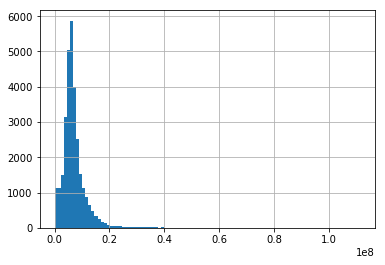

In [81]:
df['price_doc'].hist(bins = 100)

**Question 20: From the plot in Q15, most of the data have smaller values and the right tail of the distribution is very long. Apply a logorithm transformation to price and add this as a new feature called 'log_price'.**

In [85]:
df['log_price'] = df['price_doc'].map(lambda x: np.log(x))

** Question 21: Drop the log_price column.**

In [89]:
df.drop(['log_price'],axis = 1, inplace = True)

**Question 22: Save the dataframe we have now to train_new.csv file**

In [90]:
df.to_csv('train_new.csv',index = False)

**Now you've finished basic data processing for Sberbank dataset.**(Time:1h30min)